# <a name = 'p9'>AIM : </a>
* We have to identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following :

* Classify if a customer is going to churn or not.
* Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

# We will be using ANN models and H2O Auto ML in this project

# <a name ='p5'> Time Line </a>

* Data Analysis
* Feature Engineering
* Model Building using ANN
* Model Building and Prediction using H2O Auto ML

In [1]:
# Import the nessecery library
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv("C:/Users/Mintu Adak/Desktop/Power_BI_churn_Analysis_and_prediction/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
dataset.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Analysis

In [6]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# Plot a Pie Chart 

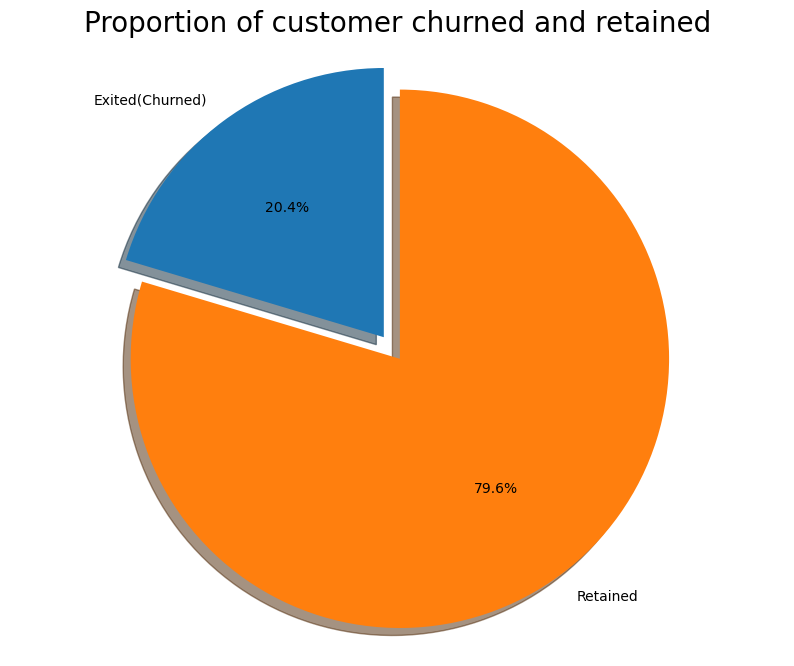

In [8]:
labels = 'Exited(Churned)', 'Retained'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [9]:
 import seaborn as sns

<Axes: xlabel='IsActiveMember', ylabel='count'>

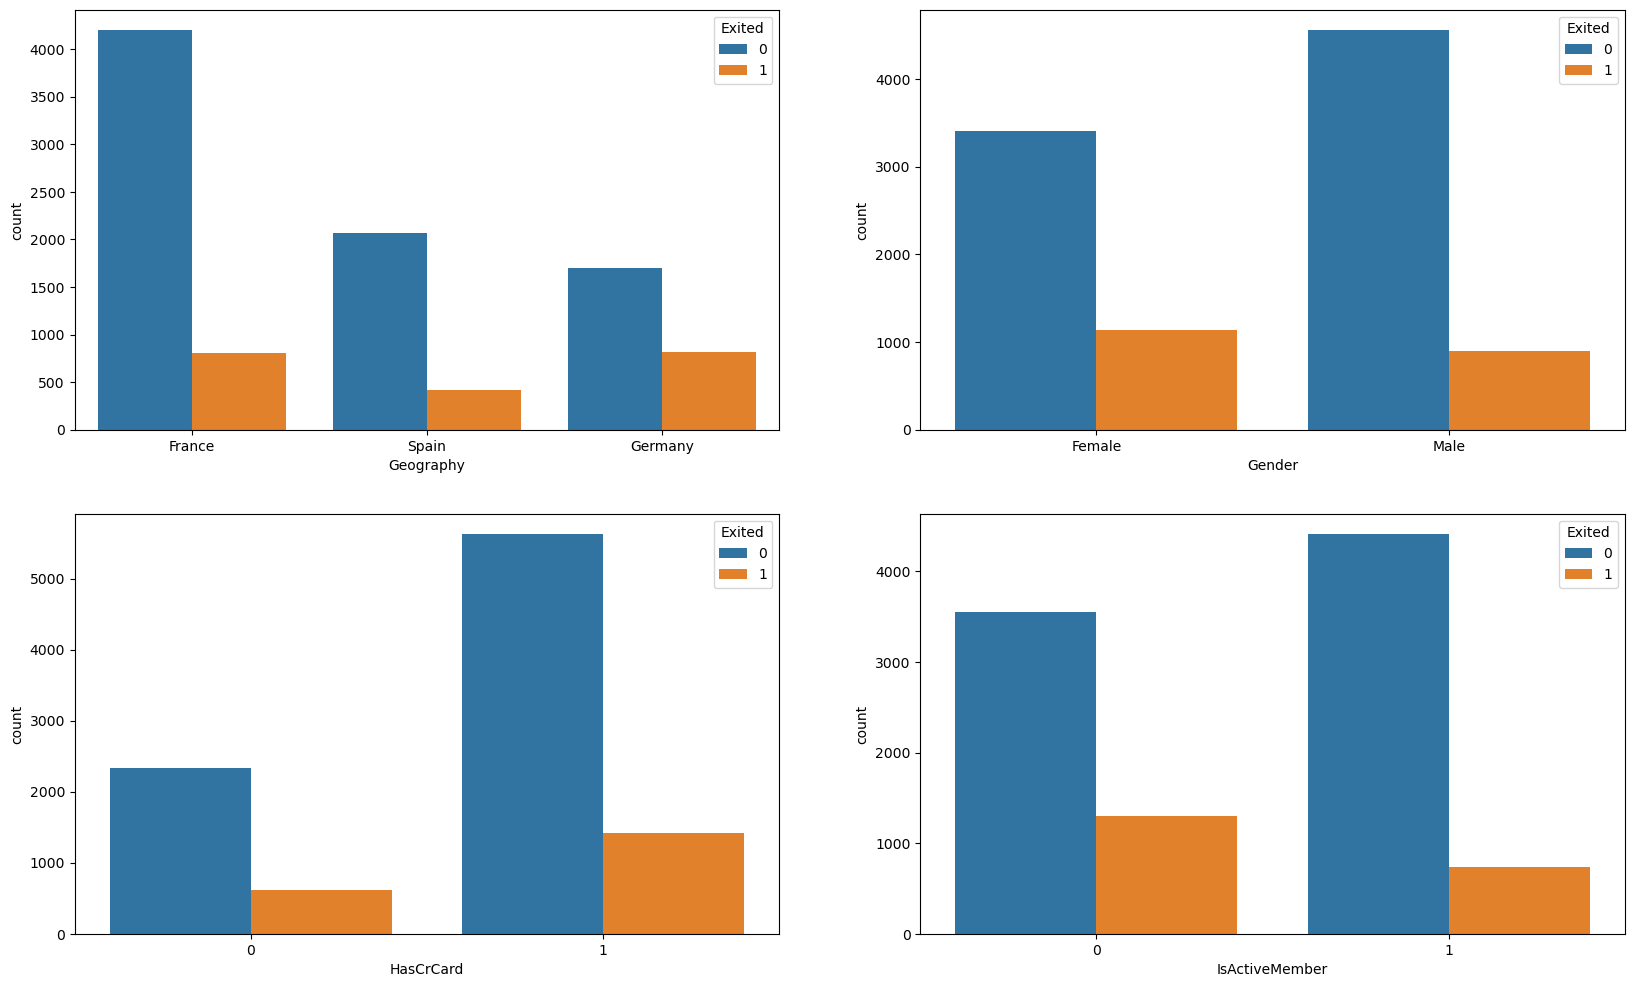

In [10]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

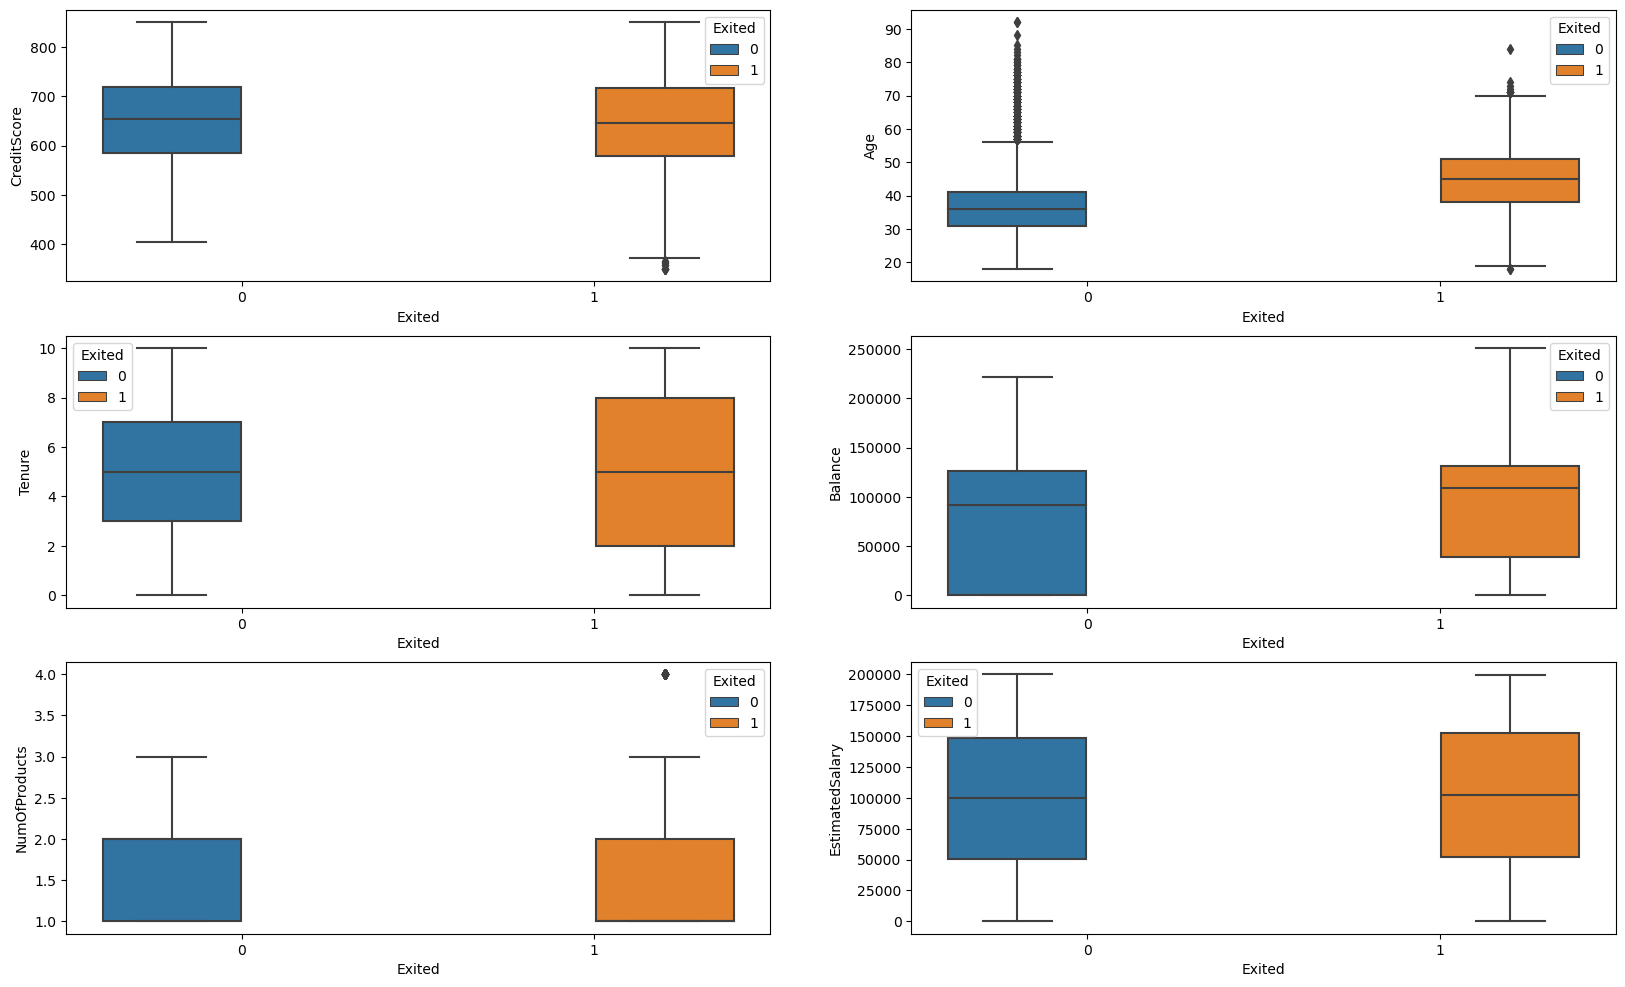

In [15]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

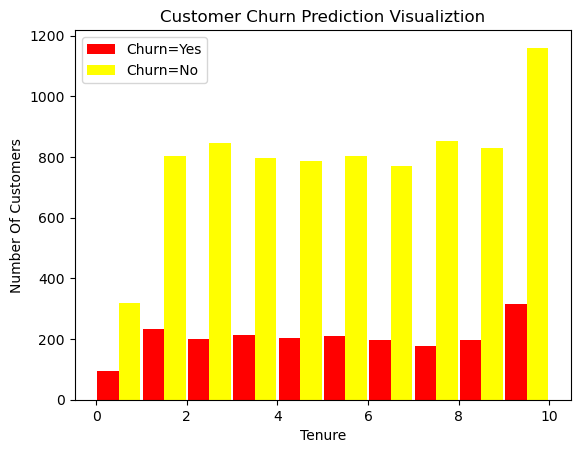

In [11]:
tenure_churn_no = dataset[dataset.Exited==0].Tenure
tenure_churn_yes = dataset[dataset.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

# <a name ='p9'> Feature Engineering </a>

##### *Making a new column BalanceSalaryRatio*

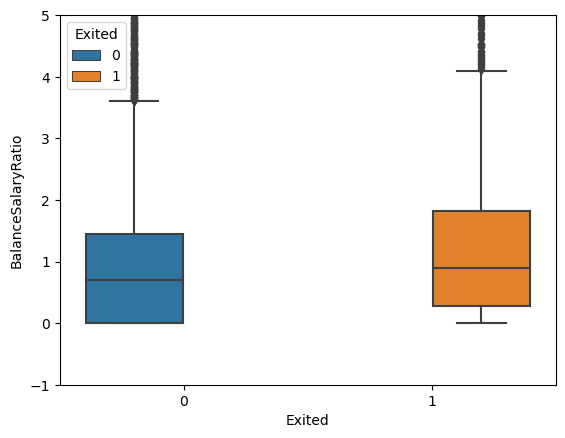

In [12]:
dataset['BalanceSalaryRatio'] = dataset.Balance /dataset.EstimatedSalary
sns.boxplot(y = 'BalanceSalaryRatio',x = 'Exited',hue = 'Exited', data = dataset)
plt.ylim(-1,5)
plt.show()

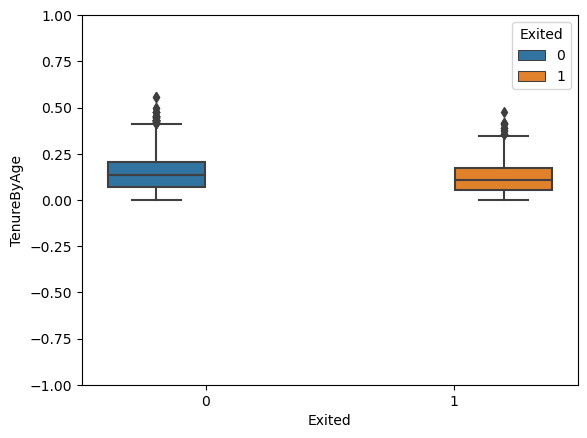

In [13]:
dataset['TenureByAge'] = dataset.Tenure / dataset.Age
sns.boxplot(y = 'TenureByAge' , x ='Exited' , hue = 'Exited',data = dataset)
plt.ylim(-1,1)
plt.show()

#### Printing The Categorical Variables

In [14]:
def print_unique_col_values(dataset):
    for column in dataset:
        if dataset[column].dtypes == 'object':
            print(f'{column}:{dataset[column].unique()}')

In [15]:
print_unique_col_values(dataset)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


### Label Encoding

In [16]:
dataset['Gender'].replace({'Male':1 ,'Female':0},inplace = True)

In [17]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


# <a name = 'p9'> One Hot Encoding Method</a> 

In [18]:
dataset1 = pd.get_dummies(data = dataset,columns = ['Geography'])
dataset1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


In [32]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset1[scale_var] = scaler.fit_transform(dataset1[scale_var])

In [33]:
dataset1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


In [28]:
X = dataset1.drop('Exited',axis='columns').values  ##independent features
y = dataset1['Exited'].values  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
len(X_train.columns)

14

 # <a name = 'p9'>Model Building and Prediction </a>

### The Sequential Model 

* A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [30]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [37]:
X_train_tensor = tf.convert_to_tensor(X_train,dtype = tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train,dtype = tf.float32)
model.fit(X_train_tensor, y_train_tensor , epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8690
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8708
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8689
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8696
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3195 - accuracy: 0.8694
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8691
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8704
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8698
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8692
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3180 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8690
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8700
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8708
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8692
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.8714
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8712
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.8687
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8708
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8708
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3153 - accuracy: 

In [38]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8535


[0.356385201215744, 0.8535000085830688]

In [39]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


## Converting the prediction to 0,1 to check accuracy

In [40]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Checking the Accuracy

In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

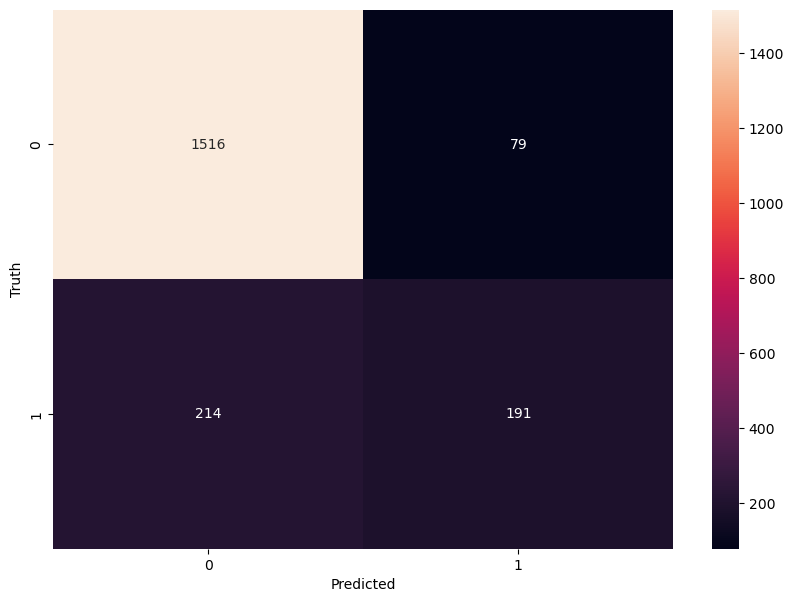

In [43]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:

from sklearn.metrics import accuracy_score
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")



Accuracy score is:  85.35000000000001 %
